In [ ]:
#Inspirational Quote:

'''If I collect butterflies and pin them to styrofoam this does not make me a scientist. 
If I collect data related to those butterflies like their physical attributes, their life spans, 
their flying patterns and their mating behavior this still does not qualify me as a scientist. 
If, however, I take those data and produce some conceptual abstraction in the form of laws or 
rules that capture the behavior of that phenomenon in the form of testable models, 
then I am doing science. These models can be passed on to future generations of scientists so that they may 
"stand on the shoulders of giants" and build a career around improving our understanding of the phenomenon.'''

'''Are testable models being built using real research on the underlying complexities that an organization 
is attempting to understand and anticipate?'''

In [24]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [19]:
# Read in data from CSV
df = pd.read_csv('fake_cells.csv')
print('We have {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

We have 384 rows and 4 columns.


,id,nucleus,wall,cytoplasm
0,1,16,5,42
1,2,2,-5,84
2,3,0,-5,5
3,4,17,-4,22
4,5,10,4,31


In [20]:
df.info() # obs, # null, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 4 columns):
id           384 non-null int64
nucleus      384 non-null int64
wall         384 non-null int64
cytoplasm    384 non-null int64
dtypes: int64(4)
memory usage: 12.1 KB


In [21]:
print('ID is unique.') if df.id.nunique() == df.shape[0] else print('oops')
print('We do not need to worry about missing values.') if df.count().min() == df.shape[0] else print('oops')

ID is unique.
We do not need to worry about missing values.


In [22]:
# Lets look at summary statistics
df.describe()

,id,nucleus,wall,cytoplasm
count,384.000000,384.000000,384.000000,384.000000
mean,192.500000,10.072917,0.247396,48.533854
std,110.995495,6.008253,3.222594,28.861493
min,1.000000,0.000000,-5.000000,0.000000
25%,96.750000,5.000000,-3.000000,24.000000
50%,192.500000,10.000000,0.000000,46.500000
75%,288.250000,15.000000,3.000000,73.250000
max,384.000000,20.000000,5.000000,100.000000


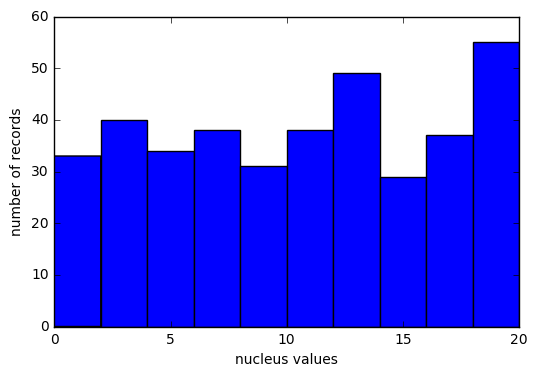

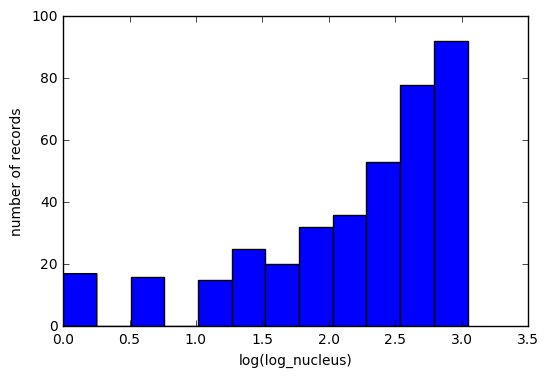

In [30]:
#plot nucleus values by number of records
plt.hist(df['nucleus'].values, bins='auto')
plt.xlabel('nucleus values')
plt.ylabel('number of records')
plt.show()

#plot log of nucleus values by number of records
df['log_nucleus'] = np.log(df['nucleus'].values + 1)
plt.hist(df['log_nucleus'].values, bins='auto')
plt.xlabel('log(log_nucleus)')
plt.ylabel('number of records')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
df.StandardScalar()

AttributeError: 'DataFrame' object has no attribute 'StandardScalar'